Introduction goes here

Data sources and methods

use-cases 

analysis and result (all code goes in this section)

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
import csv
from urllib.request import urlopen

# reads in data from the given url and 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

#print(lines)
data = pd.read_csv(url)

    
    

In [3]:
# clean the data
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data

#sns.lineplot(data=data, x="date", y="new_cases", hue='iso_code')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82984,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82985,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82986,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82987,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
#top 15/bottom 15 vaccinated countries

todays_date = (datetime.today() - timedelta(days=10)).strftime('%Y-%m-%d')
df_hc_to_date = data.loc[data['date'] == todays_date]

df_hc_to_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
412,AFG,Asia,Afghanistan,2021-04-11,57160.0,16.0,69.143,2521.0,0.0,3.429,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1266,ALB,Europe,Albania,2021-04-11,128393.0,238.0,266.000,2317.0,7.0,7.429,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1687,DZA,Africa,Algeria,2021-04-11,118516.0,138.0,127.714,3130.0,4.0,3.571,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2102,AND,Europe,Andorra,2021-04-11,12545.0,48.0,44.857,120.0,0.0,0.429,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2499,AGO,Africa,Angola,2021-04-11,23457.0,126.0,118.000,553.0,3.0,1.571,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80898,VEN,South America,Venezuela,2021-04-11,174887.0,1101.0,1252.000,1778.0,19.0,16.571,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
81352,VNM,Asia,Vietnam,2021-04-11,2693.0,1.0,8.857,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
82183,YEM,Asia,Yemen,2021-04-11,5357.0,81.0,79.857,1049.0,18.0,14.714,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
82582,ZMB,Africa,Zambia,2021-04-11,90029.0,111.0,157.000,1226.0,0.0,0.857,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [5]:
#df_hc_to_date
df_top_15_most_vaccinated = df_hc_to_date.sort_values(['people_vaccinated'], ascending=False).head(15)
df_top_15_most_vaccinated

for index,row in df_top_15_most_vaccinated.iterrows():
    print(row['location'] , "  ", row['people_vaccinated'])

United States    119242902.0
India    91587400.0
United Kingdom    32190576.0
Brazil    20654434.0
Germany    13323595.0
Turkey    10907432.0
France    10814693.0
Mexico    9673708.0
Italy    9192101.0
Russia    8692848.0
Chile    7376196.0
Canada    7198857.0
Bangladesh    5627107.0
Poland    5581068.0
Israel    5321780.0


Text(0.5, 1.0, 'Countries With Most Vaccinated Population')

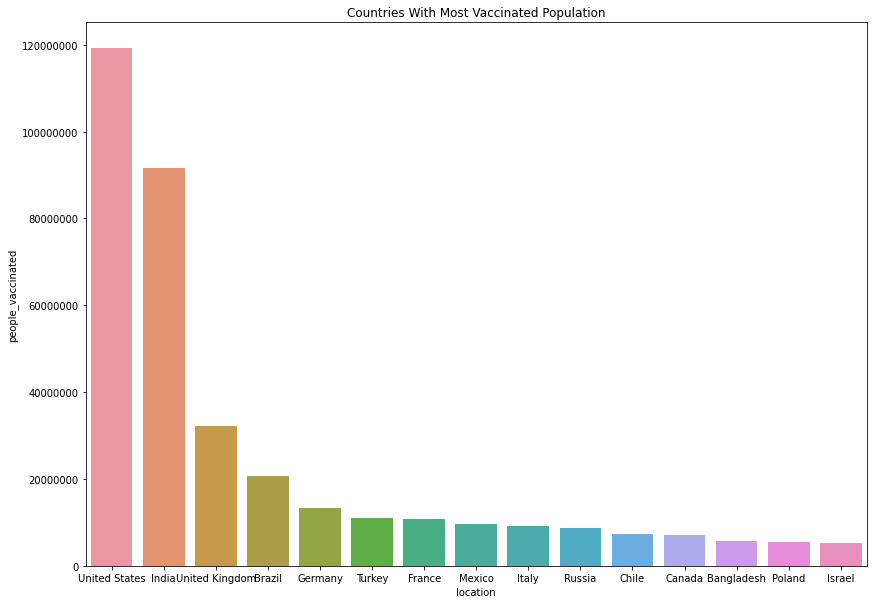

In [6]:
# TODO: title
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x="location", y="people_vaccinated", data=df_top_15_most_vaccinated).set_title('Countries With Most Vaccinated Population')

In [7]:
df_new = data[data['location'].apply(lambda x: x in df_top_15_most_vaccinated['location'].values.flatten())]
df_new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6440,BGD,Asia,Bangladesh,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6441,BGD,Asia,Bangladesh,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6442,BGD,Asia,Bangladesh,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6443,BGD,Asia,Bangladesh,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
6444,BGD,Asia,Bangladesh,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79121,USA,North America,United States,2021-04-16,31575640.0,79991.0,70096.857,566224.0,861.0,713.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79122,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,708.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79123,USA,North America,United States,2021-04-18,31670031.0,42018.0,67450.571,567217.0,313.0,712.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79124,USA,North America,United States,2021-04-19,31737964.0,67933.0,67122.429,567694.0,477.0,714.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Text(0.5, 1.0, 'Vaccine Progress For 15 Countries With Most Vaccinated Population')

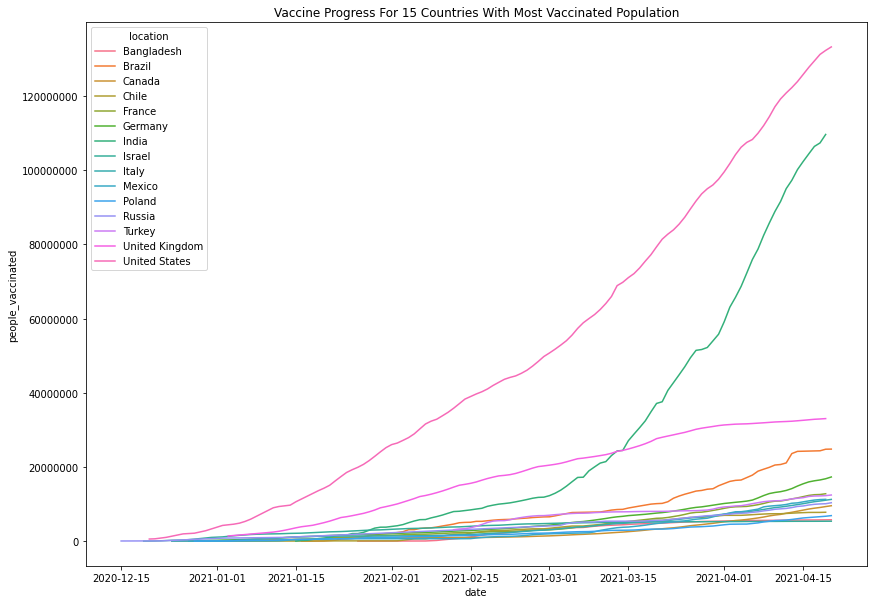

In [8]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=df_new, x='date', y='people_vaccinated', hue='location').set_title('Vaccine Progress For 15 Countries With Most Vaccinated Population')

Text(0.5, 1.0, 'People Vaccinated vs. Extreme Poverty Levels Per Country')

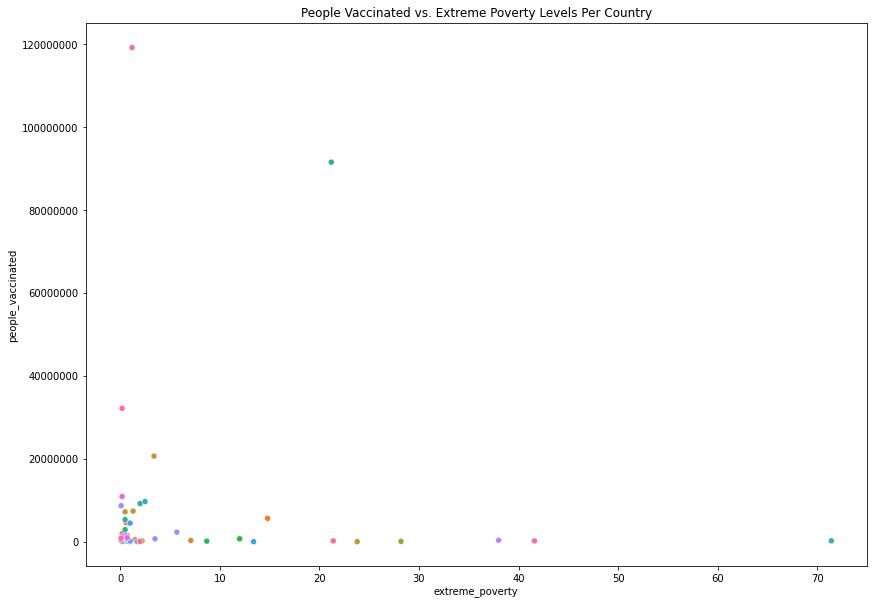

In [9]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df_hc_to_date, x='extreme_poverty', y='people_vaccinated', hue='location', legend=False).set_title('People Vaccinated vs. Extreme Poverty Levels Per Country')

In [10]:
df_sum = data.groupby(['location']).sum()
df_sum.reset_index(inplace=True)
df_sum = df_sum.rename(columns = {'index':'location'})
#df_sum = df_sum[df_sum['icu_patients'] != 0]

df_sum_vaccinations = df_hc_to_date[['location', 'people_vaccinated']].dropna()

df_sum_icu_patients = df_sum[['location', 'icu_patients']]
df_sum_icu_patients = df_sum_icu_patients[df_sum_icu_patients['icu_patients'] != 0]
#df_sum_icu_patients
pd_sum_vaccines_and_icu_patients = pd.merge(df_sum_icu_patients, df_sum_vaccinations, on='location', how='inner')
pd_sum_vaccines_and_icu_patients

#pd.concat([df_sum['icu_patients'], df_hc_to_date['people_vaccinated'].dropna()], axis=0, keys=None)

,location,icu_patients,people_vaccinated
0,Austria,86107.0,1502896.0
1,Belgium,180260.0,1928560.0
2,Bulgaria,81194.0,459409.0
3,Canada,161200.0,7198857.0
4,Czechia,215760.0,1381155.0
5,Denmark,12463.0,883162.0
6,Estonia,7377.0,259061.0
7,Finland,6556.0,1124365.0
8,France,1017978.0,10814693.0
9,Germany,829818.0,13323595.0


Text(0.5, 1.0, 'People Vaccinated vs. ICU Patients Per Country')

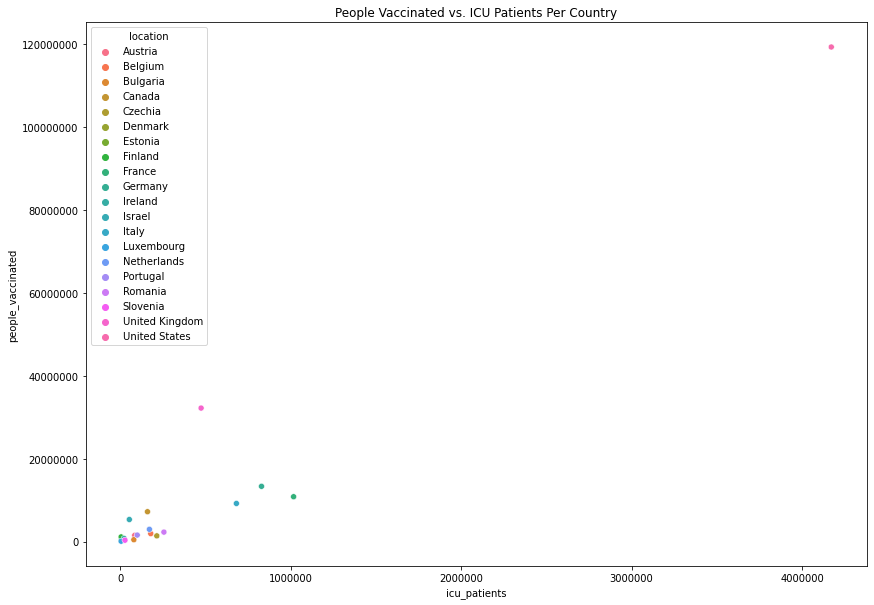

In [11]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data=pd_sum_vaccines_and_icu_patients, x='icu_patients', y='people_vaccinated', hue='location').set_title('People Vaccinated vs. ICU Patients Per Country')

In [12]:
df_tourism = pd.read_csv('tourism.csv', names=["Country Name","iso_code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020", "2021"], skiprows=5)
df_tourism_2019 = df_tourism.loc[:, ['iso_code', '2019']].dropna()

df_total_cases_present = df_hc_to_date.loc[:, ['iso_code', 'location', 'total_cases']]


df_tourism_and_total_cases = pd.merge(df_tourism_2019, df_total_cases_present).dropna()


[Text(0.5, 0, 'Total Covid Cases'), Text(0, 0.5, 'Tourism GDP (2019)')]

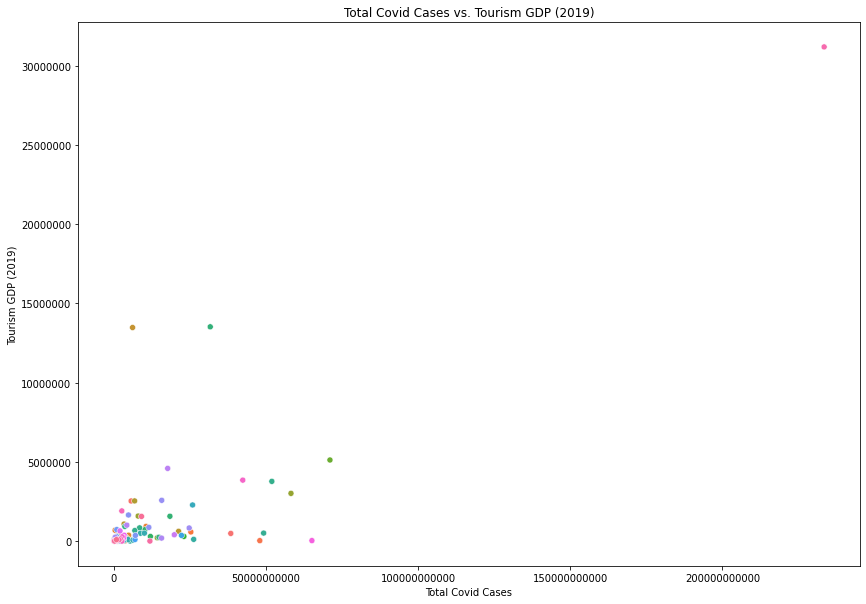

In [18]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
tourism_scatter = sns.scatterplot(data=df_tourism_and_total_cases, x='2019', y='total_cases', hue='location', legend=False)
tourism_scatter.set_title('Total Covid Cases vs. Tourism GDP (2019)')
tourism_scatter.set(xlabel='Total Covid Cases', ylabel='Tourism GDP (2019)')

In [19]:
scipy.stats.pearsonr(df_tourism_and_total_cases['2019'], df_tourism_and_total_cases['total_cases'])

(0.7945298920168705, 6.840733791160866e-27)

We can see that there is a pretty strong correlation between a country's tourism gdp and total covid cases. However, it is important to note that the tourism gdp was taken from 2019 as there was not a lot  of data for 2020 and that some countries did not report their tourism gdp so they were excluded from the data and visualization. There are a ton of factors our analysis isn't taking into account such as missing data (how was tourism gdp affected during covid instead of before) and

In [20]:
df_tourism_and_total_cases['2019']

0      8.500000e+07
1      3.950000e+08
2      2.458000e+09
3      3.841330e+10
4      5.654000e+09
           ...     
118    1.679000e+09
119    1.183000e+10
120    2.071000e+08
121    9.064000e+09
122    8.200000e+08
Name: 2019, Length: 118, dtype: float64

Conclusions